In [ ]:
%pip install matplotlib

In [ ]:
%pip install tensorflow

MNIST dataset (handwritten digit classification) is one of the best examples. It's a simple but effective example to see the core principles of CNNs and understand their power in image classification tasks.

Why MNIST?
It’s a relatively simple dataset, which is ideal for beginners.
The dataset consists of 28x28 pixel images of handwritten digits (0 to 9).
It’s small enough to quickly run experiments, but large enough to showcase how CNNs can outperform traditional methods.

CNN Example for MNIST Classification
Let’s go over an example of building a CNN for MNIST using TensorFlow/Keras. This example introduces important CNN concepts such as convolutional layers, pooling layers, and how they can be used to improve image classification accuracy compared to fully connected layers.

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

2. Load and Preprocess Data

The MNIST dataset is included in Keras, making it easy to load.

You’ll preprocess the images to normalize them to a range of 0-1 and reshape the data to fit the CNN.

In [5]:
# Load the dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Reshape the images to include a channel dimension (28, 28, 1)
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

# Normalize the images to have values between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


3. Build the CNN Model

The model will have convolutional layers followed by pooling layers, and finally, dense layers to classify the images.

In [7]:
# Build the model
model = models.Sequential()

# Convolutional layer with 32 filters, 3x3 kernel, ReLU activation
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

# Pooling layer to downsample the feature map
model.add(layers.MaxPooling2D((2, 2)))

# Add another convolutional and pooling layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Add a third convolutional layer with more filters
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Flatten the 3D output to 1D for the fully connected layers
model.add(layers.Flatten())

# Fully connected layer
model.add(layers.Dense(64, activation='relu'))

# Output layer with 10 units (for 10 classes) and softmax activation
model.add(layers.Dense(10, activation='softmax'))


4. Compile the Model

Choose an optimizer (adam is a good default).

Use sparse_categorical_crossentropy as the loss function because it’s a multi-class classification problem.

Track accuracy during training.

In [8]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


5. Train the Model

Train the model on the training data for a few epochs (e.g., 5 epochs).

In [9]:
# Train the model
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.8626 - loss: 0.4426 - val_accuracy: 0.9845 - val_loss: 0.0514
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9827 - loss: 0.0542 - val_accuracy: 0.9877 - val_loss: 0.0365
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9888 - loss: 0.0369 - val_accuracy: 0.9876 - val_loss: 0.0395
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9916 - loss: 0.0288 - val_accuracy: 0.9890 - val_loss: 0.0320
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9925 - loss: 0.0232 - val_accuracy: 0.9911 - val_loss: 0.0278


6. Evaluate the Model

After training, evaluate the model’s performance on the test set.

In [10]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9881 - loss: 0.0373
Test accuracy: 0.991100013256073


7. Visualize Results

Plot the accuracy and loss curves to see how the model performed during training.

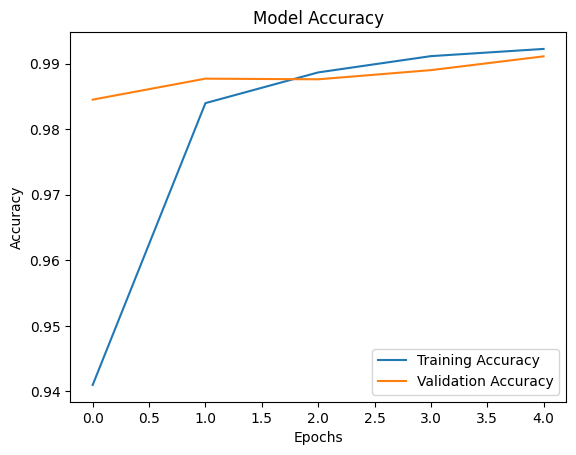

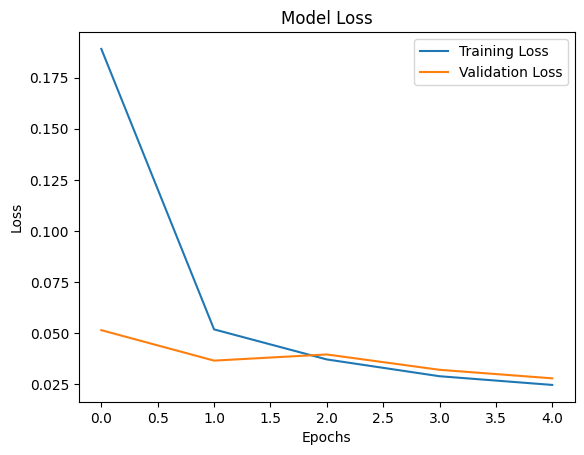

In [11]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


CNN Breakdown:

Convolutional Layers (Conv2D):

These layers use filters (kernels) to detect patterns in the input image, like edges or textures.
Each filter extracts different features, and the result is a feature map.

Max Pooling Layers (MaxPooling2D):

Pooling layers reduce the spatial dimensions of the feature maps to reduce the computational complexity and prevent overfitting.
MaxPooling takes the maximum value in a 2x2 window, summarizing the feature map.

Flatten Layer (Flatten):

The Flatten layer converts the 2D feature maps into a 1D array, so it can be input into the fully connected layers.

Fully Connected Layers (Dense):

These layers are traditional neural networks that take the flattened features and output a classification.
The final layer has 10 units (for 10 digits), with a softmax activation function to output a probability distribution over the classes.